In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression

In [183]:
#read the data
idata = pd.read_csv('/Users/nandy/Downloads/ionosphere.csv')

idata['y']=(idata.target=='g')*1


#### Some information on the dataset
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the [paper](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf) for more details. 

The targets were free electrons in the ionosphere."Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In order to check the effect of regularization on test data, split the data into train and test using sklearn.

In [184]:
#split the data into train and test
indices = range(len(idata))
itest = np.random.choice(indices, int(0.2*len(indices)), False)
# last False: no replacements
itrain = list(set(indices).difference(itest))
testDat = idata.iloc[itest]
trainDat = idata.iloc[itrain]
xcol=['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34']
x=trainDat[xcol]
y=trainDat['y']

In [58]:
mlog = LogisticRegression().fit(x, y)
print('intercept:', mlog.intercept_)
print('coef:', mlog.coef_)

xt=testDat[xcol]
from sklearn.metrics import accuracy_score
test_preds = mlog.predict(xt)
print("Accuracy of logistic model:",accuracy_score(test_preds,testDat.y))

intercept: [-2.63526333]
coef: [[ 1.58668945  0.          1.47918165  0.32522368  1.23835211  1.03810466
   0.63373441  1.0478408   0.97409192 -0.25885733 -0.7916571  -0.3468656
   0.09410044  0.57484817  0.52713463  0.21689432 -0.08346936  0.18911653
  -1.13987851 -0.2381859  -0.0423564  -1.80248046  0.08802651  0.7060993
   0.6388153   1.01462799 -1.65861167  0.19538533  0.97695962  0.67699655
   0.96536625 -0.22292556 -0.14509794 -1.0372474 ]]
Accuracy of logistic model: 0.8428571428571429


    1. Perform a ridge regression using sklearn. Test for the accuracy on the test dataset

In [66]:
#perform ridge regression and test accuracy

mlog = LogisticRegression(penalty='l2', C=1).fit(x, y)
print('intercept:', mlog.intercept_)
print('coef:', mlog.coef_)

xt=testDat[xcol]
from sklearn.metrics import accuracy_score
test_preds = mlog.predict(xt)
print("Accuracy of logistic model:",accuracy_score(test_preds,testDat.y))


intercept: [-2.63526333]
coef: [[ 1.58668945  0.          1.47918165  0.32522368  1.23835211  1.03810466
   0.63373441  1.0478408   0.97409192 -0.25885733 -0.7916571  -0.3468656
   0.09410044  0.57484817  0.52713463  0.21689432 -0.08346936  0.18911653
  -1.13987851 -0.2381859  -0.0423564  -1.80248046  0.08802651  0.7060993
   0.6388153   1.01462799 -1.65861167  0.19538533  0.97695962  0.67699655
   0.96536625 -0.22292556 -0.14509794 -1.0372474 ]]
Accuracy of logistic model: 0.8428571428571429


The logistic regression results are similar to Ridge penalty with C=1. Hence same accuracy

    2. Perform lasso regression using sklearn. Test for the accuracy on the test dataset

In [185]:
#perform lasso regression and test accuracy
mlog = LogisticRegression(penalty='l1', C=1).fit(x, y)
print('intercept:', mlog.intercept_)
print('coef:', mlog.coef_)

xt=testDat[xcol]
from sklearn.metrics import accuracy_score
test_preds = mlog.predict(xt)
print("Accuracy of logistic model:",accuracy_score(test_preds,testDat.y))


intercept: [-4.36867468]
coef: [[ 3.13403418  0.          1.65818772  0.10580723  1.72728498  1.17644836
   0.52839328  1.37264748  0.27761989  0.         -0.77379049 -0.18380443
   0.          0.09497173  0.32078401  0.          0.          0.40687158
   0.          0.37214861  0.         -1.58087633  0.28062669  0.23502899
   0.45530609  0.36088051 -1.42412993  0.          0.          1.03164214
   0.89416761  0.          0.         -1.80296646]]
Accuracy of logistic model: 0.8857142857142857


    3. Tune the parameters of C(1/lambda) and appropriate choice of regularization. Default values of C and regularization is 1.0 and 'l2' - ridge respectively. Record the results (accuracy, coefficients and lambdas) in a dataframe.

In [187]:
#perform tuning and record the results
i=0
result=pd.DataFrame()
result1=pd.DataFrame()
rng=[2,1,.7,.5,.01]

for i in range(0,5):
    mlog = LogisticRegression(penalty='l1', C=rng[i]).fit(x, y)
    result.loc[i,'penalty_type']= "Lasso"
    result.loc[i,'C']= rng[i]
    result.loc[i,'intercept']= mlog.intercept_
    xt=testDat[xcol]
    from sklearn.metrics import accuracy_score
    test_preds = mlog.predict(xt)
    result.loc[i,'accuracy']= accuracy_score(test_preds,testDat.y)
    coe=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(mlog.coef_))],axis=1)
    j=0
    for j in range(0,len(coe)):
        result.loc[i,j+4]= coe.iloc[j,1]

result.columns = ['penalty_type', 'C','intercept','accuracy','x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34']
print(result)

for i in range(0,5):
    mlog = LogisticRegression(penalty='l2', C=rng[i]).fit(x, y)
    result1.loc[i,'penalty_type']= "Ridge"
    result1.loc[i,'C']= rng[i]
    result1.loc[i,'intercept']= mlog.intercept_
    xt=testDat[xcol]
    from sklearn.metrics import accuracy_score
    test_preds = mlog.predict(xt)
    result1.loc[i,'accuracy']= accuracy_score(test_preds,testDat.y)
    coe=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(mlog.coef_))],axis=1)
    j=0
    for j in range(0,len(coe)):
        result1.loc[i,j+4]= coe.iloc[j,1]

result1.columns = ['penalty_type', 'C','intercept','accuracy','x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34']
print(result1)


  penalty_type     C  intercept  accuracy       x_1  x_2       x_3       x_4  \
0        Lasso  2.00  -7.503369  0.914286  5.976082  0.0  2.187580  0.037398   
1        Lasso  1.00  -4.368115  0.885714  3.133584  0.0  1.658061  0.105819   
2        Lasso  0.70  -3.200145  0.857143  2.104647  0.0  1.429586  0.089295   
3        Lasso  0.50  -2.460416  0.857143  1.527759  0.0  1.294659  0.035188   
4        Lasso  0.01   0.000000  0.414286  0.000000  0.0  0.000000  0.000000   

        x_5       x_6    ...         x_25      x_26      x_27  x_28      x_29  \
0  1.609334  2.446851    ...     1.056125  0.471790 -2.186413   0.0  0.002887   
1  1.727261  1.176369    ...     0.455382  0.360877 -1.424079   0.0  0.000000   
2  1.658589  0.799255    ...     0.274950  0.348240 -1.146939   0.0  0.000000   
3  1.585533  0.554878    ...     0.086089  0.293422 -0.956279   0.0  0.000000   
4  0.000000  0.000000    ...     0.000000  0.000000  0.000000   0.0  0.000000   

       x_30      x_31      x_32 

    4. Plot the coefficients against lambdas and accuracy against lambdas for both lasso and ridge regularization.

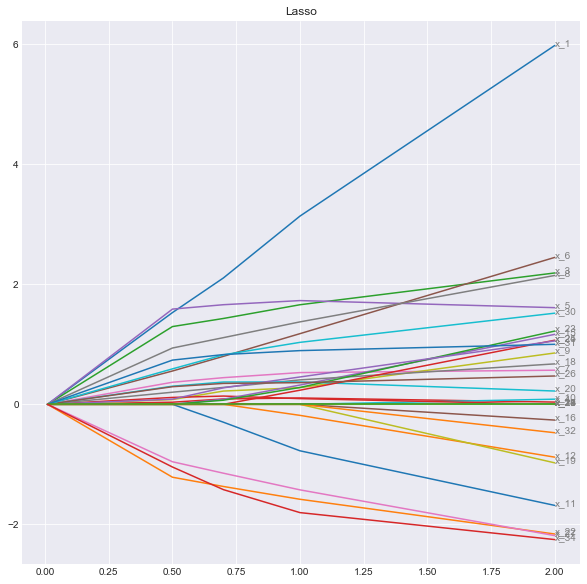

In [189]:
#plot coefficients against lambdas and accuracy against lambdas
#Lasso 
i=0
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Lasso')

for i in range(4,38):
    j=i-4
    plt.plot(result['C'], result.iloc[:,i])
    plt.text(2, result.iloc[0,i],xcol[j], horizontalalignment='left', size='medium', color='grey')
    


Text(2,0.885714,'Accuracy')

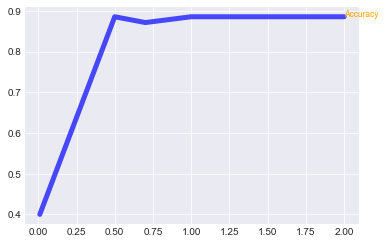

In [179]:
plt.plot(result['C'], result.iloc[:,3],linewidth=5, alpha=0.7,color='b')
plt.text(2, result.iloc[0,3], 'Accuracy', horizontalalignment='left', size='small', color='orange')
plt.title('Lasso Accuracy')


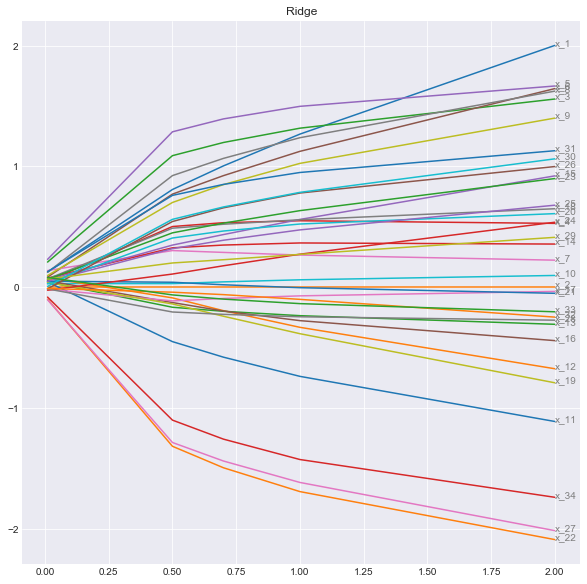

In [190]:
#plot coefficients against lambdas and accuracy against lambdas
#Ridge 
i=0
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Ridge')

for i in range(4,38):
    j=i-4
    plt.plot(result1['C'], result1.iloc[:,i])
    plt.text(2, result1.iloc[0,i],xcol[j], horizontalalignment='left', size='medium', color='grey')
    


Text(0.5,1,'Ridge Accuracy')

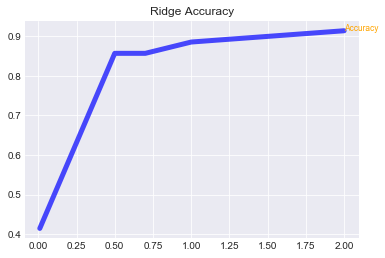

In [191]:
plt.plot(result['C'], result.iloc[:,3],linewidth=5, alpha=0.7,color='b')
plt.text(2, result.iloc[0,3], 'Accuracy', horizontalalignment='left', size='small', color='orange')
plt.title('Ridge Accuracy')
